# Gapminder Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#ref">References</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project it is going to be analyzing the data associated with Gapminder (https://www.gapminder.org/), an independent Swedish foundation that fights devastating misconceptions about global development. In particular, we will be interested in finding trends among countries that have significantly improved their educational level in recent years and how this improvement relates to wealth, population density, CO2 emissions associated to fossil fuels and human development index.

The data to be used are the following:

- **Mean years of school until 25-34 years old**<br>
    Average number of years of school attended by all people in the age and gender group specified, including primary, secondary and tertiary education.
    

- **GDP/person**<br>
    Gross Domestic Product per person adjusted for differences in purchasing power (in international dollars, fixed 2011 PPP based on 2011 ICP).


- **Population density**<br>
    Average number of people on each square km of land in the given country.


- **CO2 emissions/person**<br>
    Carbon dioxide emissions from the burning of fossil fuels (Metric tonnes of C02 per person).


- **Human development index**<br>
    Human Development Index is an index used to rank countries by level of "human development". It contains three dimensions: health level, educational level and living standard.

In [ ]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

Check the Data Wrangling Gapmider file to see the process of generating the general dataframe.

### General Properties

In [2]:
# Read the file
gen = pd.read_csv ('gen.csv')
gen.head()

,country,year,co2_emissions,pop_density,hdi,gdp/capita,edu_male_25,edu_female_25
0,Afghanistan,1990,0.2110,19.0,0.295,1860,2.26,0.42
1,Afghanistan,1991,0.1830,20.4,0.300,1650,2.32,0.43
2,Afghanistan,1992,0.0962,22.2,0.309,1520,2.38,0.45
3,Afghanistan,1993,0.0851,24.2,0.305,1010,2.44,0.46
4,Afghanistan,1994,0.0758,26.2,0.300,721,2.50,0.48


In [3]:
gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 8 columns):
country          4600 non-null object
year             4600 non-null int64
co2_emissions    4600 non-null float64
pop_density      4600 non-null float64
hdi              4600 non-null float64
gdp/capita       4600 non-null int64
edu_male_25      4600 non-null float64
edu_female_25    4600 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 287.6+ KB


In [4]:
gen.describe()

,year,co2_emissions,pop_density,hdi,gdp/capita,edu_male_25,edu_female_25
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,2002.000000,4.504911,156.581078,0.641896,14524.039348,8.843102,8.247878
std,7.211886,6.499490,478.007453,0.164045,17882.560546,3.006118,3.855176
min,1990.000000,0.010700,1.410000,0.194000,361.000000,1.540000,0.420000
25%,1996.000000,0.503500,24.200000,0.514000,2780.000000,6.580000,5.060000
50%,2002.000000,2.100000,66.700000,0.668000,7850.000000,8.940000,8.705000
75%,2008.000000,6.300000,133.000000,0.768719,19000.000000,11.300000,11.500000
max,2014.000000,70.000000,7890.000000,0.948000,124000.000000,15.300000,15.600000


<a id='eda'></a>
## Exploratory Data Analysis


### Which are the trends of each metric?

In order to have a broader view of the behavior of each variable, the mean of each one of them between 1990 and 2014 it is going to be analyzed.

Additionally, a new column is going to be created with the average of male and female education to have a measure of the educational trend without taking into account the gender.

In [5]:
#Create a column for the education mean
gen['edu_25'] = (gen['edu_male_25'] + gen['edu_female_25'])/2
gen.head()

,country,year,co2_emissions,pop_density,hdi,gdp/capita,edu_male_25,edu_female_25,edu_25
0,Afghanistan,1990,0.2110,19.0,0.295,1860,2.26,0.42,1.340
1,Afghanistan,1991,0.1830,20.4,0.300,1650,2.32,0.43,1.375
2,Afghanistan,1992,0.0962,22.2,0.309,1520,2.38,0.45,1.415
3,Afghanistan,1993,0.0851,24.2,0.305,1010,2.44,0.46,1.450
4,Afghanistan,1994,0.0758,26.2,0.300,721,2.50,0.48,1.490


In [21]:
#Create a mean dataframe worldwide
gen_mean = gen.drop(columns = ['country'], axis = 'columns').groupby('year').mean()
gen_mean.head(25)

,co2_emissions,pop_density,hdi,gdp/capita,edu_male_25,edu_female_25,edu_25
year,,,,,,,
1990,4.349404,127.177446,0.613542,11975.483696,7.394293,6.627772,7.011033
1991,4.316450,129.368587,0.612208,11762.646739,7.516467,6.759239,7.137853
1992,4.393847,131.587065,0.610984,11788.445652,7.636196,6.894728,7.265462
1993,4.448631,133.824185,0.611053,11824.402174,7.756522,7.027609,7.392065
1994,4.397498,136.168152,0.611404,12034.760870,7.879022,7.162446,7.520734
1995,4.362983,138.509783,0.612468,12293.309783,7.998370,7.296630,7.647500
1996,4.373061,140.868261,0.614834,12594.505435,8.116304,7.431413,7.773859
1997,4.408902,143.274674,0.617185,13068.945652,8.233859,7.563207,7.898533
1998,4.401018,145.742989,0.619427,13321.206522,8.352065,7.693152,8.022609


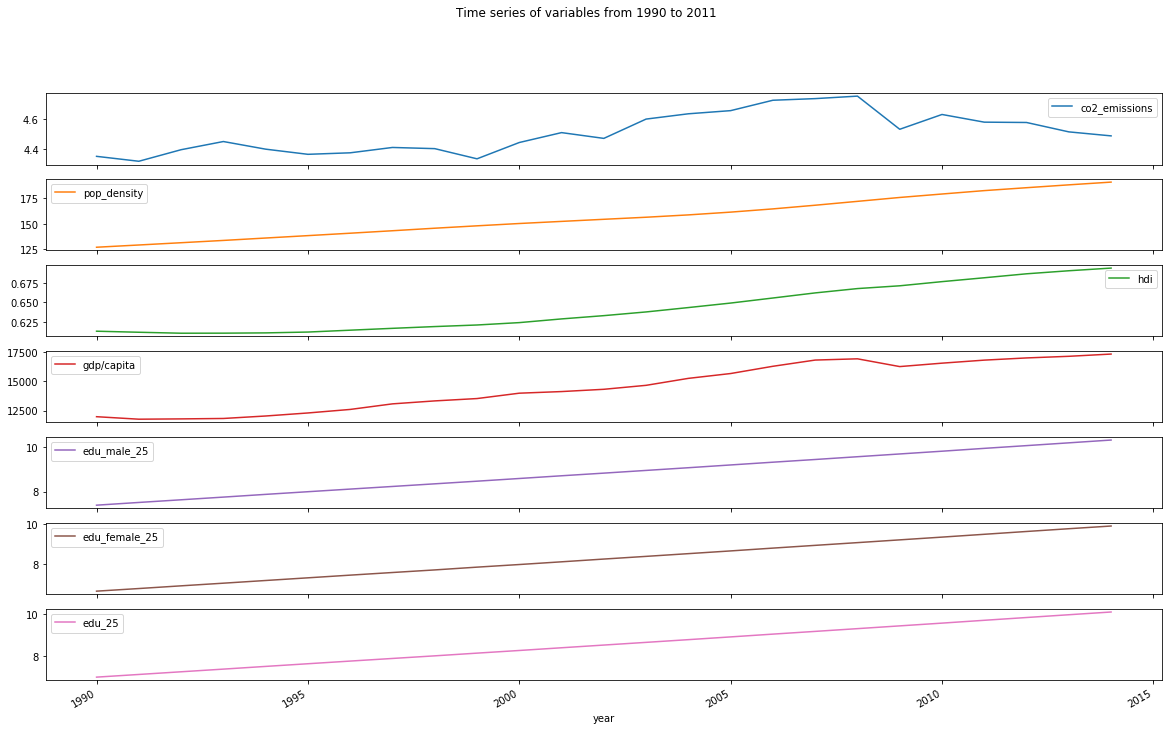

In [7]:
#Plot time series of variables' means
gen_mean.plot(figsize = (20,12),subplots = True, title = 'Time series of variables from 1990 to 2011');


All variables have increased since 1990 and most of them have done so in a linear way, however, C02 emissions and GDP have fluctuated over time. More precisely, it can be observed that both GDP and CO2 emissions have a turning point in 2008, close to the economic crisis, but while CO2 emissions have maintained a decreasing trend since then, the GDP per capita has retaken a growing trend from 2009.

### Which is the distribution of each metric? How has it evolved over time?

In [8]:
#Table of 2014
gen14 = gen.groupby(['country', 'year']).max().query('year == 2014')
gen14.head()

,,co2_emissions,pop_density,hdi,gdp/capita,edu_male_25,edu_female_25,edu_25
country,year,,,,,,,
Afghanistan,2014,0.294,51.1,0.479,1800,4.04,0.95,2.495
Albania,2014,1.970,106.0,0.762,10700,11.80,12.10,11.950
Algeria,2014,3.740,16.3,0.743,13500,8.38,7.58,7.980
Andorra,2014,5.830,169.0,0.857,44900,14.20,15.00,14.600
Angola,2014,1.290,21.6,0.531,6810,7.11,5.18,6.145


In [9]:
gen14.describe()

,co2_emissions,pop_density,hdi,gdp/capita,edu_male_25,edu_female_25,edu_25
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,4.486464,190.738967,0.693701,17311.630435,10.316630,9.896033,10.106332
std,6.088072,617.612294,0.155103,18807.893266,2.949665,3.982088,3.435264
min,0.044700,1.890000,0.347000,677.000000,2.820000,0.950000,2.095000
25%,0.650000,32.500000,0.563250,3757.500000,8.055000,6.762500,7.441250
50%,2.270000,79.100000,0.723500,10850.000000,10.600000,10.750000,10.500000
75%,5.835000,157.000000,0.804250,24250.000000,12.725000,13.350000,13.062500
max,43.900000,7890.000000,0.948000,117000.000000,15.300000,15.600000,15.400000


In [10]:
#table of 1990
gen90 = gen.groupby(['country', 'year']).max().query('year == 1990')
gen90.head()

,,co2_emissions,pop_density,hdi,gdp/capita,edu_male_25,edu_female_25,edu_25
country,year,,,,,,,
Afghanistan,1990,0.211,19.0,0.295000,1860,2.26,0.42,1.340
Albania,1990,1.680,120.0,0.635000,4460,8.65,8.28,8.465
Algeria,1990,2.990,10.8,0.577000,10300,4.79,4.22,4.505
Andorra,1990,7.470,116.0,0.746619,28400,11.10,11.40,11.250
Angola,1990,0.432,9.5,0.809500,4760,4.39,2.63,3.510


In [11]:
gen90.describe()

,co2_emissions,pop_density,hdi,gdp/capita,edu_male_25,edu_female_25,edu_25
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,4.349404,127.177446,0.613542,11975.483696,7.394293,6.627772,7.011033
std,5.746422,343.855302,0.168164,15189.739829,2.775218,3.426085,3.076510
min,0.024000,1.410000,0.209000,386.000000,1.540000,0.420000,1.085000
25%,0.441750,19.675000,0.494500,2500.000000,5.157500,3.565000,4.447500
50%,1.705000,54.000000,0.643000,6335.000000,7.245000,7.010000,6.990000
75%,6.457500,121.750000,0.745405,15150.000000,9.837500,9.587500,9.738750
max,28.400000,4300.000000,0.925909,112000.000000,13.400000,13.300000,13.350000


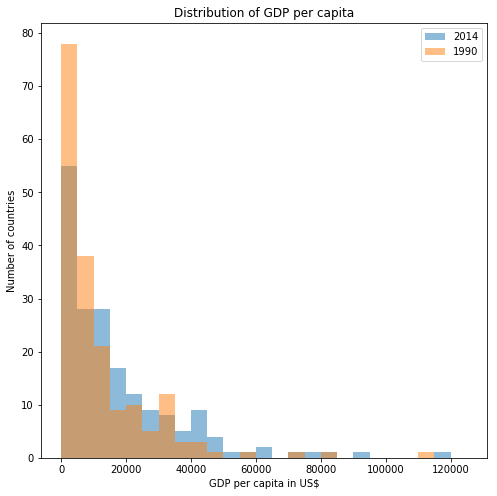

In [12]:
#Plot GDP distribution
fig, ax = plt.subplots(figsize = (8, 8))
bin_edges = np.arange(0, gen['gdp/capita'].max()+5000, 5000)
ax.hist(gen14['gdp/capita'], bins = bin_edges, alpha = 0.5, label = '2014')
ax.hist(gen90['gdp/capita'], bins = bin_edges, alpha = 0.5, label = '1990')
ax.set_title('Distribution of GDP per capita')
ax.set_xlabel('GDP per capita in US$')
ax.set_ylabel('Number of countries')
ax.legend(loc = 'upper right')
plt.show()

In this graph, it is possible to notice that the average GDP per capita of the countries rose from 1990 to 2014. The greatest variation is observed in the poorest countries because whereas in 1990 there were about 120 countries with an average GDP per capita in the range of 0 to 10000 dollars, in 2014 there were only 80.

In addition, it is easy to see that the vast majority of countries are in a range of GDP per capita from 0 to 20,000 dollars and about 50% of them generate a GDP per capita lower than 10,000 dollars.

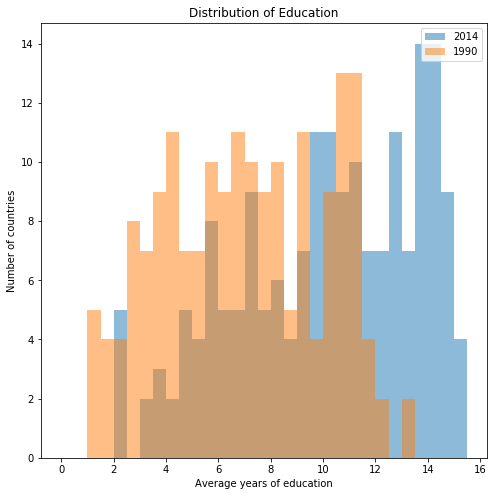

In [13]:
#Plot Education distribution
fig, ax = plt.subplots(figsize = (8, 8))
bin_edges = np.arange(0, gen['edu_25'].max()+0.5, 0.5)
ax.hist(gen14['edu_25'], bins = bin_edges, alpha = 0.5, label = '2014')
ax.hist(gen90['edu_25'], bins = bin_edges, alpha = 0.5, label = '1990')
ax.set_title('Distribution of Education')
ax.set_xlabel('Average years of education')
ax.set_ylabel('Number of countries')
ax.legend(loc = 'upper right')
plt.show()

The average education time has increased significantly by reducing to 0 the number of countries with an average education time of between 0 and 2 years and by significantly increasing the number of countries with an average school life of between 12 and 16 years.

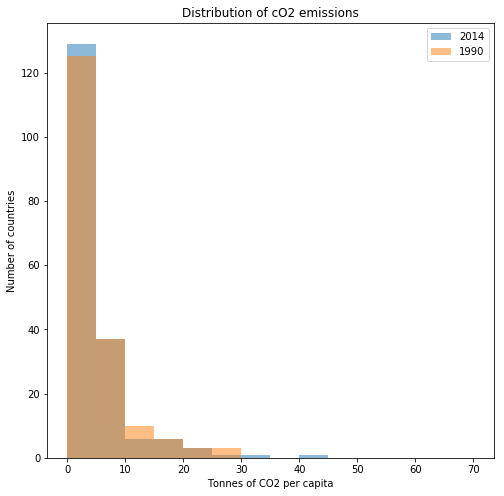

In [14]:
#Plot CO2 emissions distribution
fig, ax = plt.subplots(figsize = (8, 8))
bin_edges = np.arange(0, gen['co2_emissions'].max()+5, 5)
ax.hist(gen14['co2_emissions'], bins = bin_edges, alpha = 0.5, label = '2014')
ax.hist(gen90['co2_emissions'], bins = bin_edges, alpha = 0.5, label = '1990')
ax.set_title('Distribution of cO2 emissions')
ax.set_xlabel('Tonnes of CO2 per capita')
ax.set_ylabel('Number of countries')
ax.legend(loc = 'upper right')
plt.show()

The behaviour in CO2 emissions is similar to the one presented by the GDP/capita since most countries emit very little CO2 (The average emission is about 4.4 tons per person).

Regarding the variation over time, the most visible change is that some of the countries that emitted between 0 and 1 ton per person have now started to emit between 1 and 6 tonnes per person.

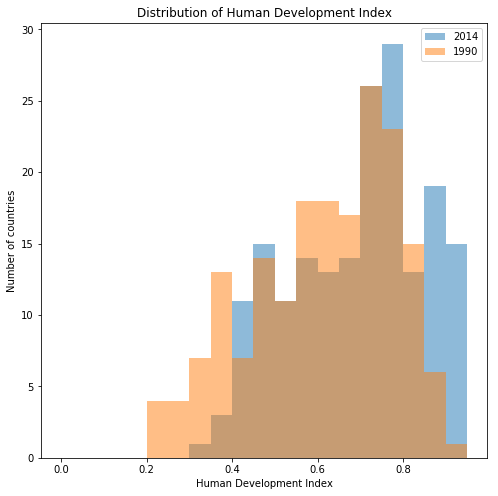

In [15]:
#Plot HDI distribution
fig, ax = plt.subplots(figsize = (8, 8))
bin_edges = np.arange(0, gen['hdi'].max()+0.05, 0.05)
ax.hist(gen14['hdi'], bins = bin_edges, alpha = 0.5, label = '2014')
ax.hist(gen90['hdi'], bins = bin_edges, alpha = 0.5, label = '1990')
ax.set_title('Distribution of Human Development Index')
ax.set_xlabel('Human Development Index')
ax.set_ylabel('Number of countries')
ax.legend(loc = 'upper right')
plt.show()

A fairly homogeneous overall increase in the human development index is observed

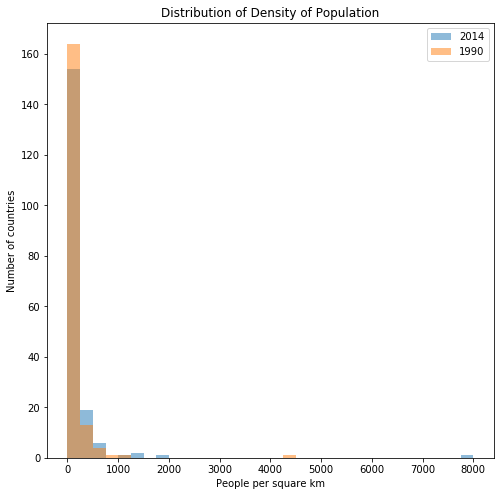

In [23]:
#Plot Population density distribution
fig, ax = plt.subplots(figsize = (8, 8))
bin_edges = np.arange(0, gen['pop_density'].max()+250, 250)
ax.hist(gen14['pop_density'], bins = bin_edges, alpha = 0.5, label = '2014')
ax.hist(gen90['pop_density'], bins = bin_edges, alpha = 0.5, label = '1990')
ax.set_title('Distribution of Density of Population')
ax.set_xlabel('People per square km')
ax.set_ylabel('Number of countries')
ax.legend(loc = 'upper right')
plt.show()

The vast majority of countries have a population density of between 0 and 500 people per square kilometre with the exception of a few outliers that reach a population density of up to 8000 people per square kilometre

## What is the correlation between Education, GDP and CO2 emissions? How has this correlation evolved over time?

In [16]:
#Correlation factor matrix
gen[['gdp/capita', 'co2_emissions', 'edu_25', 'hdi','pop_density']].corr()

,gdp/capita,co2_emissions,edu_25,hdi,pop_density
gdp/capita,1.000000,0.825523,0.542565,0.670974,0.198135
co2_emissions,0.825523,1.000000,0.447667,0.559757,0.097630
edu_25,0.542565,0.447667,1.000000,0.851748,0.091971
hdi,0.670974,0.559757,0.851748,1.000000,0.136409
pop_density,0.198135,0.097630,0.091971,0.136409,1.000000


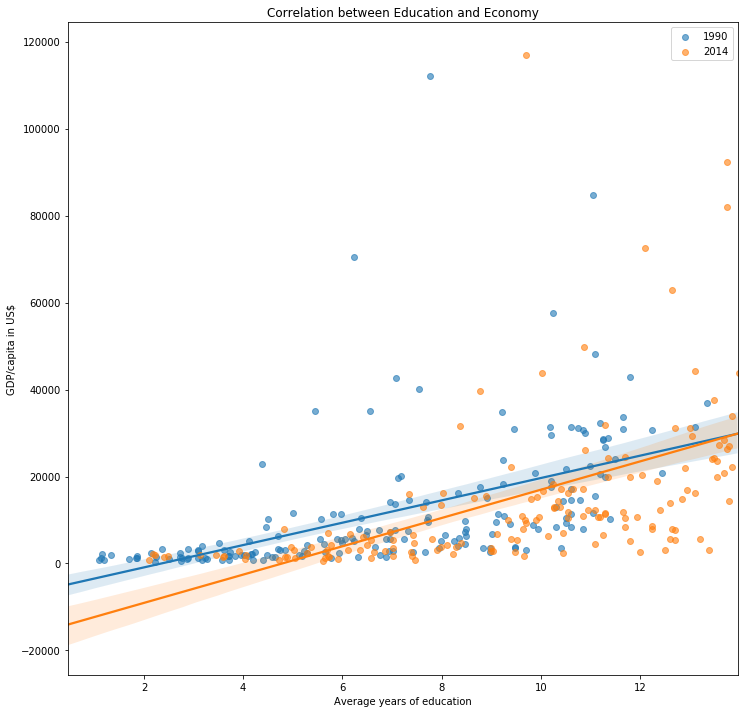

In [17]:
#Plot Education - Economy
fig, ax = plt.subplots(figsize = (12, 12))
sns.regplot(data = gen90, x = 'edu_25', y = 'gdp/capita', fit_reg = True, scatter_kws = {'alpha':0.6}, label = 1990, ax = ax)
sns.regplot(data = gen14, x = 'edu_25', y = 'gdp/capita', fit_reg = True, scatter_kws = {'alpha':0.6}, label = 2014, ax = ax);

ax.set_title('Correlation between Education and Economy')
ax.set_xlabel('Average years of education')
ax.set_ylabel('GDP/capita in US$')
ax.legend(loc = 'upper right')
plt.show()

Educational time and GDP/capita show a strong positive correlation with a correlation coefficient of Pearson R = 0.54. As the temporal variation of this correlation, it is observed that the line has become more pronounced over time, which implies the following consequences:

- With a time of study of less than 14 years, in 2014 less GDP per capita is generated than in 1990.

- With a time of study of 14 years or more, in 2014 more GDP per capita is generated than in 1990.

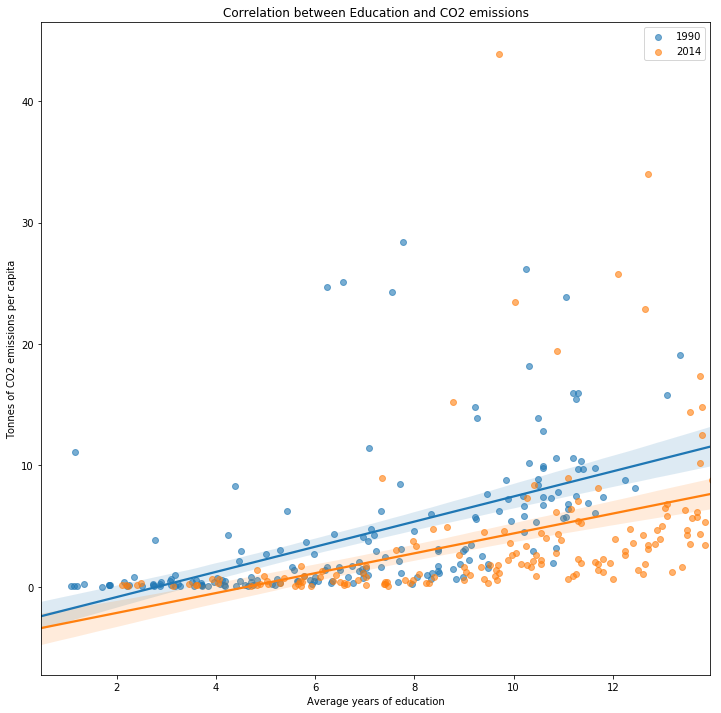

In [18]:
#Plot Education - CO2
fig, ax = plt.subplots(figsize = (12, 12))
sns.regplot(data = gen90, x = 'edu_25', y = 'co2_emissions', fit_reg = True, scatter_kws = {'alpha':0.6}, label = 1990, ax = ax)
sns.regplot(data = gen14, x = 'edu_25', y = 'co2_emissions', fit_reg = True, scatter_kws = {'alpha':0.6}, label = 2014, ax = ax);

ax.set_title('Correlation between Education and CO2 emissions')
ax.set_xlabel('Average years of education')
ax.set_ylabel('Tonnes of CO2 emissions per capita')
ax.legend(loc = 'upper right')
plt.show()

Educational time has a medium positive correlation with CO2 emission, however, this trend has decreased since 1990.

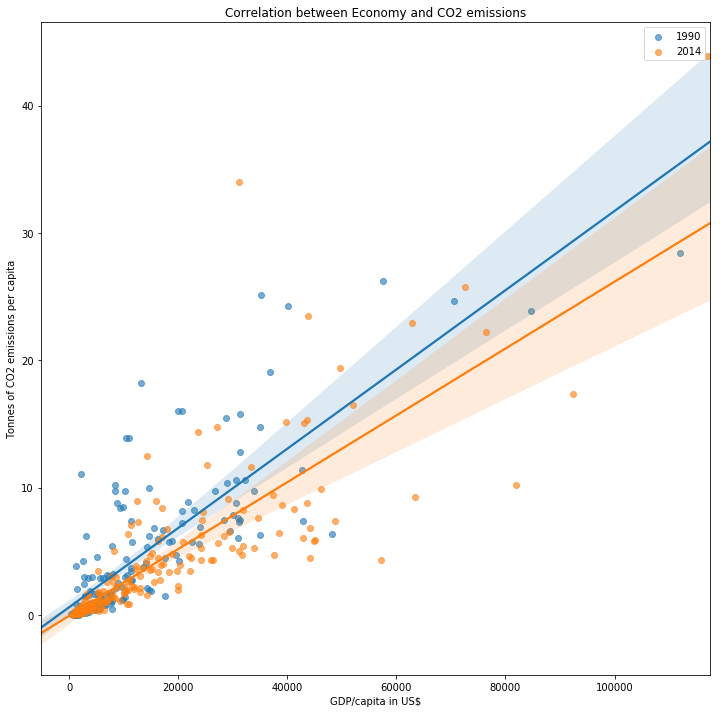

In [19]:
#Plot GDP - CO2
fig, ax = plt.subplots(figsize = (12, 12))
sns.regplot(data = gen90, x = 'gdp/capita', y = 'co2_emissions', fit_reg = True, scatter_kws = {'alpha':0.6}, label = 1990, ax = ax)
sns.regplot(data = gen14, x = 'gdp/capita', y = 'co2_emissions', fit_reg = True, scatter_kws = {'alpha':0.6}, label = 2014, ax = ax);

ax.set_title('Correlation between Economy and CO2 emissions')
ax.set_xlabel('GDP/capita in US$')
ax.set_ylabel('Tonnes of CO2 emissions per capita')
ax.legend(loc = 'upper right')
plt.show()

There is a very strong positive correlation between CO2 emissions and GDP per capita but the slope of the regression line is more horizontal in 2014 than in 1990, which means that for the same GDP per capita, on average, less CO2 has been emitted in 2014.

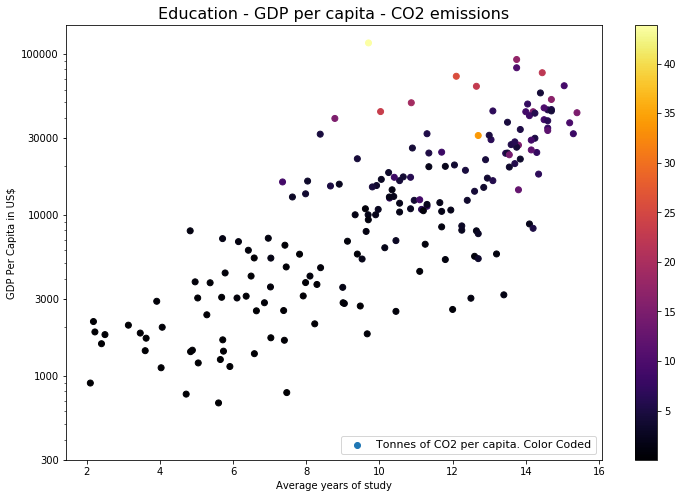

In [20]:
plt.figure(figsize = (12,8))
plt.scatter(data = gen14, x = 'edu_25', y = 'gdp/capita', c = 'co2_emissions', cmap = 'inferno')

# log scaling provides a linear relationship between GDP and HDI
plt.yscale('log')
plt.colorbar()
grid = [300, 1000, 3000, 10000, 30000, 100000]
plt.yticks(grid, grid)

plt.title('Education - GDP per capita - CO2 emissions', fontsize = 16)
plt.legend(['Tonnes of CO2 per capita. Color Coded'], fontsize = 11, loc = 'lower right')
plt.xlabel('Average years of study', fontsize = 10)
plt.ylabel('GDP Per Capita in US$', fontsize = 10);

- The three variables are correlated on a logarithmic scale.

- Most countries with per capita CO2 emissions of more than 25 tons are in the range of 10 to 14 years of study.

## Which are the most efficient countries in the relation 'GDP per capita / CO2 emissions' with a study average of more than 14 years ?

In [21]:
# create a column with the ratio of 'GDP per Capita / CO2 emissions per Capita'
gen['gdp/co2'] = (gen['gdp/capita'] / gen['co2_emissions'])
gen.head()

,country,year,co2_emissions,pop_density,hdi,gdp/capita,edu_male_25,edu_female_25,edu_25,gdp/co2
0,Afghanistan,1990,0.2110,19.0,0.295,1860,2.26,0.42,1.340,8815.165877
1,Afghanistan,1991,0.1830,20.4,0.300,1650,2.32,0.43,1.375,9016.393443
2,Afghanistan,1992,0.0962,22.2,0.309,1520,2.38,0.45,1.415,15800.415800
3,Afghanistan,1993,0.0851,24.2,0.305,1010,2.44,0.46,1.450,11868.390129
4,Afghanistan,1994,0.0758,26.2,0.300,721,2.50,0.48,1.490,9511.873351


In [22]:
# create a column with the ratio of 'GDP per Capita / CO2 emissions per Capita'
gen['hdi/pop'] = (gen['hdi'] / gen['pop_density'])
gen.head()

,country,year,co2_emissions,pop_density,hdi,gdp/capita,edu_male_25,edu_female_25,edu_25,gdp/co2,hdi/pop
0,Afghanistan,1990,0.2110,19.0,0.295,1860,2.26,0.42,1.340,8815.165877,0.015526
1,Afghanistan,1991,0.1830,20.4,0.300,1650,2.32,0.43,1.375,9016.393443,0.014706
2,Afghanistan,1992,0.0962,22.2,0.309,1520,2.38,0.45,1.415,15800.415800,0.013919
3,Afghanistan,1993,0.0851,24.2,0.305,1010,2.44,0.46,1.450,11868.390129,0.012603
4,Afghanistan,1994,0.0758,26.2,0.300,721,2.50,0.48,1.490,9511.873351,0.011450


In [23]:
# separate the countries with a mean time of study of more than 14 years
top_edu = gen.groupby(['country', 'year']).max().query('edu_25 > 14')
top_edu.head()

co2_emissions  pop_density    hdi  gdp/capita  edu_male_25  \
country year                                                               
Andorra 2010           6.12        180.0  0.819       39000         13.7   
        2011           5.87        178.0  0.819       42000         13.9   
        2012           5.92        175.0  0.843       41900         14.0   
        2013           5.90        172.0  0.850       43700         14.1   
        2014           5.83        169.0  0.857       44900         14.2   

              edu_female_25  edu_25      gdp/co2   hdi/pop  
country year                                                
Andorra 2010           14.5   14.10  6372.549020  0.004550  
        2011           14.6   14.25  7155.025554  0.004601  
        2012           14.8   14.40  7077.702703  0.004817  
        2013           14.9   14.50  7406.779661  0.004942  
        2014           15.0   14.60  7701.543739  0.005071

In [24]:
# sort the countries with a mean time of study of more than 12 years by 'GDP per Capita / CO2 emissions per Capita'
top_efficient = top_edu.groupby('country').min()['gdp/co2'].sort_values(ascending = False)
top_efficient.head(26)

country
Switzerland       11391.129032
Sweden             7761.732852
Iceland            7086.092715
Ireland            6630.434783
Andorra            6372.549020
Denmark            5238.095238
Cyprus             5213.114754
Norway             5073.170732
Belgium            4963.942308
United Kingdom     4697.554698
Netherlands        4446.601942
New Zealand        4285.714286
Georgia            3932.735426
Japan              3556.231003
Finland            3431.034483
Brunei             3353.658537
Czech Republic     3047.210300
Poland             2955.414013
Israel             2827.735645
United States      2724.324324
Australia          2700.000000
South Korea        2644.067797
Belarus            2599.704579
Canada             2142.857143
Russia             2081.300813
Ukraine            1390.000000
Name: gdp/co2, dtype: float64

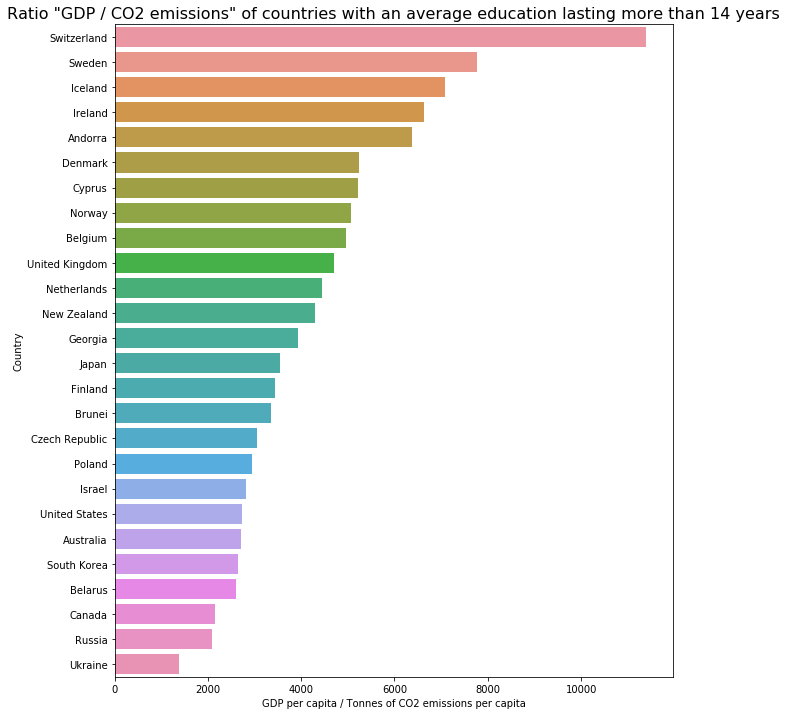

In [25]:
#Horizontal bar plot showing the GDP/CO2 ratio
plt.figure(figsize = (10,12))
sns.barplot(top_efficient.values, top_efficient.index, orient='h')
plt.title('Ratio "GDP / CO2 emissions" of countries with an average education lasting more than 14 years', fontsize = 16)
plt.xlabel('GDP per capita / Tonnes of CO2 emissions per capita', fontsize = 10)
plt.ylabel('Country', fontsize = 10);

- The first place in the graph is occupied by Switzerland, this could be explained because 85% of energy used is imported, mostly derived from fossil fuels and nuclear power, so the emissions derived from this energy would be counted in the emissions of some other country. [1]

- Sweden, besides being the ninth country in the world that invests more in education, 7.7% of its GDP [2], it is the EU's country with the highest percentage of renewable energy use [3]. These characteristics make Sweden a model to follow in the green transition.

<a id='conclusions'></a>
## Conclusions

- A **general increase trend** in the mean of all the variables is observed in a linear manner with two exceptions. GDP per capita has decreased in 2008, this could be explained by the financial crisis, and has resumed the incremental trend in 2009. CO2 emissions per capita have increased until 2008 and have started to fluctuate with a slightly decreasing trend since then.


- The **greatest increase in GDP** per capita has been observed in the countries with the **lowest incomes**.


- A **strong correlation of education with GDP** per capita (R = 0.54) and a **moderate correlation between education and CO2 emissions** per capita (R = 0.44) have been observed. This difference could leave room for more advanced research to understand how to improve economically without increasing pollution.


- Among the countries with more than 14 years of average education duration, it has been observed that **Sweden could be a model to follow in the green transition** as it shows a very high GDP per capita and low CO2 emissions.

### Limitations

- The amount of CO2 emissions is not totally reliable since there are many countries that consume imported energy and their emissions are not counted as their own.

- The main focus of this project has been limited to the time range from 1990 to 2014, but to draw deeper conclusions, a longer period of time should be analyzed.

- Various correlation analysis between variables have been performed in this project, but since the correlation does not imply causation, further analysis should be done.

<a id='ref'></a>
## References

[1] https://en.wikipedia.org/wiki/Energy_in_Switzerland#Renewable_energy_in_Switzerland

[2] https://en.wikipedia.org/wiki/List_of_countries_by_spending_on_education_(%25_of_GDP)

[3] https://ec.europa.eu/eurostat/statistics-explained/index.php/Renewable_energy_statistics

[4] https://github.com/dhavalpotdar/Gapminder-World-Data-Analysis

[5] https://pandas.pydata.org/

[6] https://stackoverflow.com/

[7] https://matplotlib.org/

[8] https://seaborn.pydata.org/

In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0